In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler


In [17]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/kidney.csv')

In [18]:
df.head()

,CensusTract,Kidney_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,3.1,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,2.9,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,3.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,2.7,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,3.3,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [19]:
df.set_index('CensusTract', inplace=True)
df.head()


,Kidney_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,3.1,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,2.9,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,3.3,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,2.7,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,3.3,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


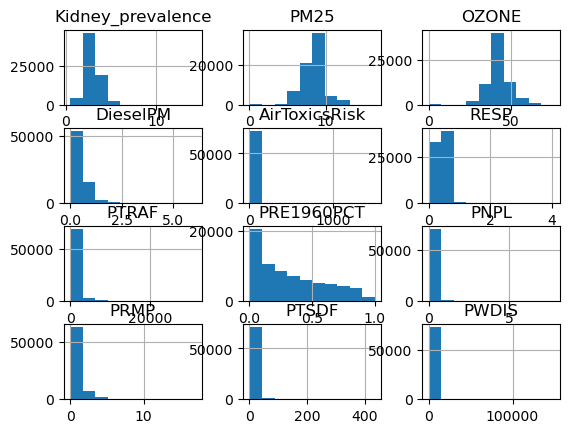

In [20]:
df.hist()
plt.show()

In [21]:
X = df.copy()
X.drop('Kidney_prevalence', axis=1, inplace=True)
y = df['Kidney_prevalence']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

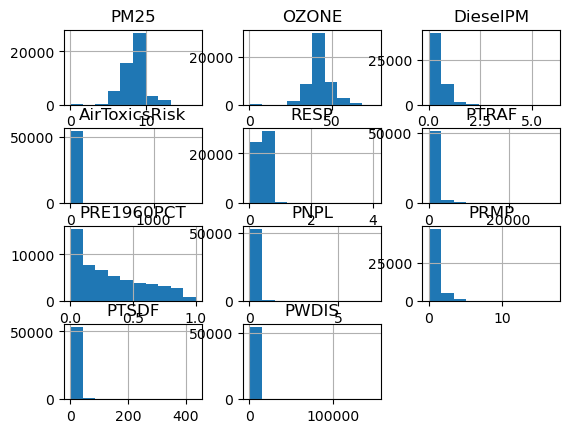

In [23]:
X_train.hist()
plt.show()

In [24]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
51009010502,7.559324,41.005600,0.346370,31.807601,0.413123,181.430877,0.379121,0.029411,1.198271,2.120918,5.340500e-03
26081002100,8.211244,44.355912,0.437892,53.898941,0.337457,2886.230386,0.867108,0.446456,1.163850,6.865117,3.126128e-02
41061970600,7.256211,45.568922,0.025726,17.421625,0.230108,91.890417,0.446491,0.008360,0.152515,0.032821,1.921233e-04
41033361300,9.103968,42.426646,0.080902,30.139343,0.480548,44.613255,0.126691,0.020330,0.029202,0.318115,4.235000e-07
40109108900,8.536215,48.481748,0.188572,32.042907,0.407587,10.765440,0.259873,0.065152,0.291124,0.113553,3.998700e-04


In [25]:
# Taking the log of the data in X_train that are not close to being normally distributed
pt = PowerTransformer()
pt.fit(X_train[['DieselPM']])
X_train['DieselPM'] = pt.transform(X_train[['DieselPM']])

pt1 = PowerTransformer()
pt1.fit(X_train[['AirToxicsRisk']])
X_train['AirToxicsRisk'] = pt1.transform(X_train[['AirToxicsRisk']])

pt2 = PowerTransformer()
pt2.fit(X_train[['RESP']])
X_train['RESP'] = pt2.transform(X_train[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train[['PTRAF']])
X_train['PTRAF'] = pt3.transform(X_train[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train[['PRE1960PCT']])
X_train['PRE1960PCT'] = pt4.transform(X_train[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train[['PNPL']])
X_train['PNPL'] = pt5.transform(X_train[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train[['PRMP']])
X_train['PRMP'] = pt6.transform(X_train[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train[['PTSDF']])
X_train['PTSDF'] = pt7.transform(X_train[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train[['PWDIS']])
X_train['PWDIS'] = pt8.transform(X_train[['PWDIS']])

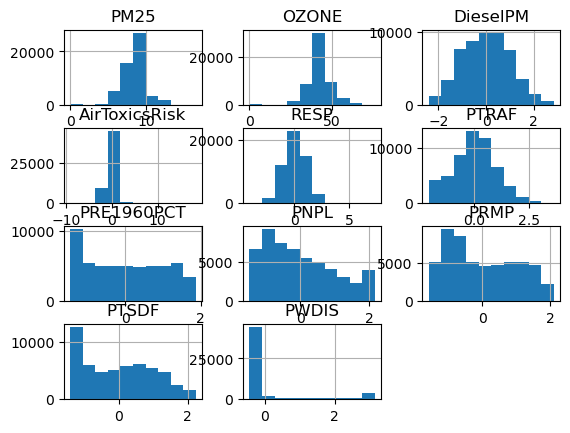

In [26]:
X_train.hist()
plt.show()

Perhaps PWDIS should just be left out of the data. I can decide that when I pick a model to use.

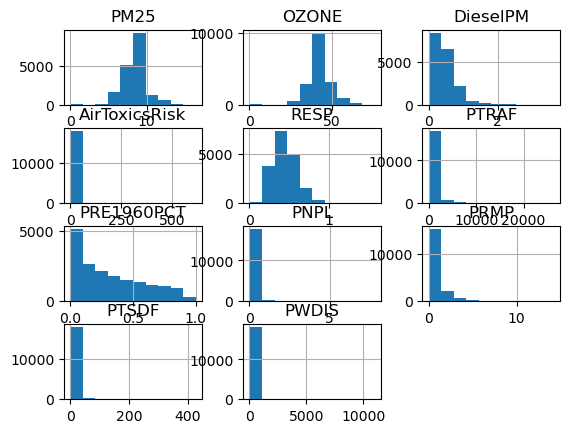

In [27]:
X_test.hist()
plt.show()

In [28]:
# Transforming the test data using the PowerTransformer that I fit on the train data
X_test['DieselPM'] = pt.transform(X_test[['DieselPM']])

X_test['AirToxicsRisk'] = pt1.transform(X_test[['AirToxicsRisk']])

X_test['RESP'] = pt2.transform(X_test[['RESP']]) 

X_test['PTRAF'] = pt3.transform(X_test[['PTRAF']])

X_test['PRE1960PCT'] = pt4.transform(X_test[['PRE1960PCT']])

X_test['PNPL'] = pt5.transform(X_test[['PNPL']])

X_test['PRMP'] = pt6.transform(X_test[['PRMP']])

X_test['PTSDF'] = pt7.transform(X_test[['PTSDF']])

X_test['PWDIS'] = pt8.transform(X_test[['PWDIS']])

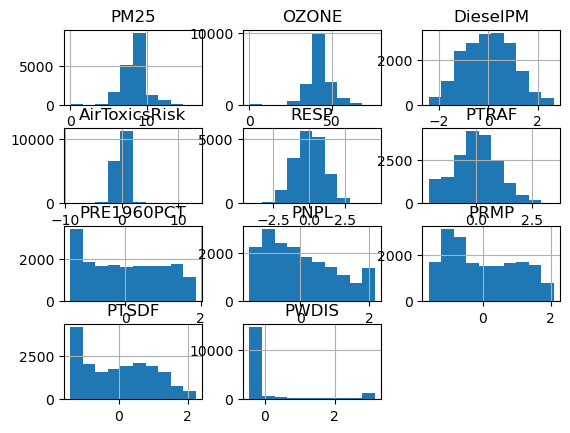

In [29]:
X_test.hist()
plt.show()

Kidney data should now be ready to model

In [30]:
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_kidney')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_kidney')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_kidney')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_kidney')